In [1]:
!pip install matplotlib pandas scikit-learn tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 12.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 31.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 47.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 105.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 54.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 31.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

2025-05-30 16:14:18.131610: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-30 16:14:18.136239: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-30 16:14:18.148223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748614458.167663     570 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748614458.173687     570 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748614458.190012     570 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
# --- CONFIGURATION ---
MODEL_PATH = "modern_model-CNN_RNN_model.keras"         # Path to trained model
X_VAL_PATH = "X_val.npy"             # Path to validation input
Y_VAL_PATH = "y_val.npy"             # Optional for future use

# --- LOAD MODEL ---
model = tf.keras.models.load_model(MODEL_PATH, compile=False)

# --- LOAD VALIDATION DATA ---
X_val = np.load(X_VAL_PATH)

# --- GET MODEL PREDICTIONS ---
y_pred = model.predict(X_val)  # Shape: (batch_size, time_steps, num_classes)

2025-05-30 16:14:23.237371: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


149/149 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step


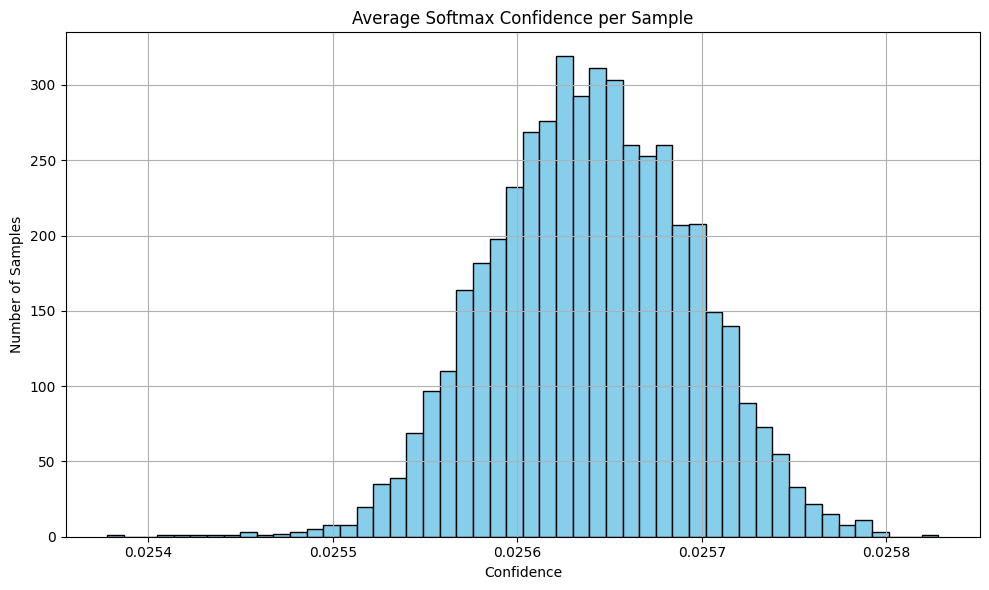

Average softmax confidence across validation set: 0.025639992


In [4]:
# --- COMPUTE SOFTMAX CONFIDENCE ---
softmax_probs = tf.nn.softmax(y_pred, axis=-1).numpy()
max_conf_per_step = np.max(softmax_probs, axis=-1)          # (batch_size, time_steps)
avg_conf_per_sample = np.mean(max_conf_per_step, axis=-1)   # (batch_size,)
mean_confidence = np.mean(avg_conf_per_sample)

# --- PLOT CONFIDENCE DISTRIBUTION ---
plt.figure(figsize=(10, 6))
plt.hist(avg_conf_per_sample, bins=50, color='skyblue', edgecolor='black')
plt.title("Average Softmax Confidence per Sample")
plt.xlabel("Confidence")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- PRINT RESULT ---
print("Average softmax confidence across validation set:", mean_confidence)